In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [3]:
wc = 0.1  * 2 * np.pi  # cavity frequency
wa = 0.1  * 2 * np.pi  # atom frequency
g  = 0.5 * 2 * np.pi  # coupling strength
kappa = 0.5          # cavity dissipation rate
gamma = 0.05           # atom dissipation rate
N = 15                 # number of cavity fock states
n_th_a = 0.0           # temperature in frequency units
tlist = np.linspace(0,10,1000)

In [4]:
qeye(3)

Quantum object: dims=[[3], [3]], shape=(3, 3), type='oper', dtype=Dia, isherm=True
Qobj data =
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

In [5]:
psi0=qutip.tensor(qutip.basis(N,1), qutip.basis(2,0)) # tensor that forms our starting state
'''
qutip.basis(N,0 or 1) represents our photon state
qutip.basis(2,1 or 0) represents our atom, which can be in either the ground state |0>, or excited state |1>
'''

'\nqutip.basis(N,0 or 1) represents our photon state\nqutip.basis(2,1 or 0) represents our atom, which can be in either the ground state |0>, or excited state |1>\n'

In [7]:
# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

In [71]:
H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())

In [72]:
c_op_list = [np.sqrt(2*gamma)*sm,np.sqrt(2*kappa)*a]

In [73]:
result = mesolve(H, psi0, tlist,c_op_list, [a.dag() * a, sm.dag() * sm])

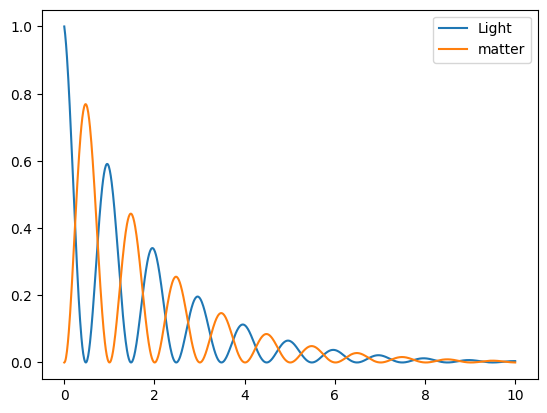

In [74]:
plt.plot(tlist, result.expect[0], label="Light")
plt.plot(tlist, result.expect[1], label="matter")
plt.legend();